### Setup

In [6]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np

### Sampling and the Central Limit Theorem

We're going to explore the concept of sampling and the true power of the Central Limit Theorem (the "golden rule of statistics") by examining data from the the City of Baltimore. We have a dataset that captures **salary** from July 1, 2017 through June 30, 2018 for city employees. (Data Dictionary Below)

**NAME** = String for the name of the employee 

**JOBTITLE** = String for the job title of the employee 

**DEPTID** = String for the associated department ID for that employee

**DESCR** = String for the department the employee was hired into

**HIRE_DT** = Date and time object for the date the employee was hired by the City of Baltimore

**ANNUAL_RT** = Integer for the Annual Salary of the employee 

**GROSS** = Float for the Gross Salary of the employee

**1.1** First load the appropriate data set into a table 

In [ ]:
# Your code here 
baltimoreEmployees = ... 

In [8]:
#Answer
baltimoreEmployees = Table.read_table('BaltimoreCityEmployeesSalaries.csv')

In [9]:
#You should see a preview of the table below
baltimoreEmployees

NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,60200,58480.5
"Aaron,Petra L",Assistant State's Attorney,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,81200,79220.7
"Abadir,Adam O",Council Technician,A02002,City Council (002),12/12/2016 12:00:00 AM,64823,57375.3
"Abaku,Aigbolosimuan O",Police Officer Trainee,A99416,Police Department (416),04/17/2018 12:00:00 AM,50440,11881.3
"Abbeduto,Mack",Law Clerk SAO,A29017,States Attorneys Office (017),05/22/2017 12:00:00 AM,38926,35138.4
"Abbott,Ethan N",Recreation Arts Instructor,A67012,R&P-Administration (012),04/11/2018 12:00:00 AM,33280,4642.72
"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,74300,75011.4
"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,66310,79114.5
"Abdi,Ezekiel W",Police Sergeant,A99160,Police Department (160),06/14/2007 12:00:00 AM,86902,112341
"Abdul Adl,Attrice A",Radio Dispatcher Sheriff,A38410,Sheriff's Office (410),09/02/1999 12:00:00 AM,48701,62065.4


Here's some statistics calculated on the **ANNUAL SALARY** of employees in the city of Baltimore. 

**Mean**= ~$56,751.77

**Median** = ~$52,456.00

**Standard Deviation** = ~$25,490.32

**1.2** Based on *just these values* what can you guess about the distribution of salaries in Baltimore? (Is it normally distributed? What type of tail would you guess this distribution has?) 

**YOUR ANSWER HERE** 

Let's visualize baltimore employee salaries, run the cell below to see a distribution of annual salaries. 

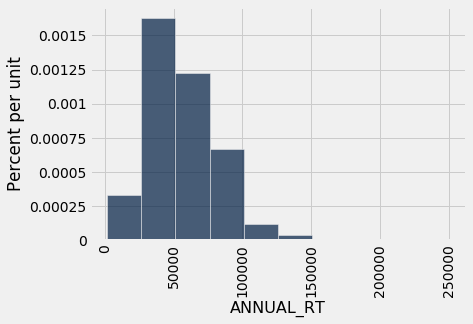

In [26]:
baltimoreEmployees.hist("ANNUAL_RT")

**1.3** Something you may notice is that the default histogram drawn doesn't do a great job of really visualizing the distribution of the dataset (half the x-axis is unused for example). We can change that though! 

Draw a new historgram with different bins that does a better job of showing this distribution.

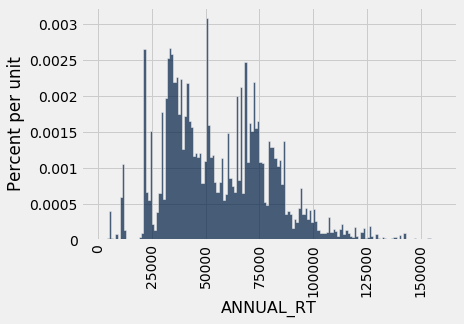

In [17]:
baltimoreEmployees.hist("ANNUAL_RT", bins=np.arange(0,160000, 1000))

**1.4** What kind of tail (left/right/none) does this dataset have?

In [ ]:
# Put your answer for the tail in a string for the variable so the autograder can check it! (All lower case)
tail = ? 

This dataset is larger than anything you've used in class so far (~13.6 K rows) and doesn't follow a normal distribution. Calculating the average of such a set might seem like a challenge but we can extrapolate the average of the entire set with sampling using the **Central Limit Theorem**. 

As a reminder, here's the definition of the Central Limit Theorem. 

The **Central Limit Theorem** says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly **normal**, regardless of the distribution of the population from which the sample is drawn.

1.5 Let's test this theorem out. First take a simple random sample of size ~10 from baltimore dataset, and find the average of the set. (The default for sampling does sampling with replacement so no need to worry about inserting a parameter.)

In [ ]:
# Your code here
average10 = ? 

In [ ]:
average10 = np.mean(baltimoreEmployees.sample(10).column("ANNUAL_RT"))
average10

One thing you can notice is that if you keep running your answer for question 1.5 you will get wildely different averages. The power of Central Limit Theorem comes from **repeating** the sampling process to generate the averages. 

1.6 Create an array that is a list of **averages** after sampling **10 items** from the Baltimore Employees table **10,000** times (Hint: You will find the **np.append** function very useful, use the help function to explore what it can do.)

In [42]:
sampledAverages = make_array()
for x in range(0, 10000):
    sampledAverages = np.append(sampledAverages, np.mean(baltimoreEmployees.sample(10).column("ANNUAL_RT")))

In [ ]:
# AUTOGRADER

**1.7** Using this array, create a table with one column named *Sampled Averages* with the values you calculated for question 1.6

In [ ]:
# Your code here
sampledAverages = ?

In [43]:
sampledAverages = Table().with_column('Sample Averages', sampledAverages)

In [44]:
# Autograder

Sample Averages
59373.9
42494.5
48930.1
76272
54511
48055.9
50930.1
43475.7
45177.5
55154.7


In [51]:
print(np.mean(sampledAverages.column("Sample Averages")))
print(np.median(sampledAverages.column("Sample Averages")))
print(np.std(sampledAverages.column("Sample Averages")))

56848.674770000005
56410.5
8182.013161822734


**1.8** We can calculate statistics on the table that we just created. What's the **mean, median, and standard deviation** of *sampledAverages* and what do those numbers actually mean? 

**YOUR ANSWER HERE**

1.9 Now create a histogram out of this table! (Feel free to change the standard bin size to create a better visualization.) 

In [ ]:
# Your code here

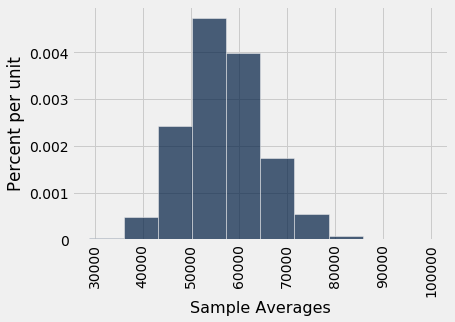

In [52]:
sampledAverages.hist("Sample Averages")

Pretty cool right? Just from a sample size of 10 we can get a normal distribution of the averages and can get a pretty good approximation of the average annual salary

-------

**Bonus**: Do the exact same process of repeatedly sampling from the Baltimore Employees dataset 10000 times, except increase the sample size to 100 and then to 300. What happens when we increase the sample size to: 

The Average of the *Sample Means*? 

The Average of the *Sample Standard Deviations*? 

The Distribution of the *Histogram*? 

Does it follow the fundamental principle of the Central Limit Theorem?

**Super Bonus** Create a **function** that when you give it a table, column name, sample size, and number of times (repetitions) to pull from that sample, it **returns** the statistics for that approximation of the Central Limit Theorem. (Make sure to return an array of size three, we want mean, median, and standard deviation in that order)!

In [53]:
def centralLimitTheorem(...) #Your parameters here 
    .... # Your code here

SyntaxError: invalid syntax (<ipython-input-53-9d287082e43c>, line 1)

In [85]:
def centralLimitTheorem(table, columnName, sampleSize, repetitions):
    sampledAverages = make_array()
    for x in range(0, repetitions):
        sampledAverages = np.append(sampledAverages, np.mean(table.sample(sampleSize).column(columnName)))
    return make_array(np.mean(sampledAverages), np.median(sampledAverages), np.std(sampledAverages))

In [90]:
#Autograder 1, if you're confident your code is correct try running the autograder multiple times
#56700.00
round(centralLimitTheorem(baltimoreEmployees,"ANNUAL_RT", 300, 10000).item(0), -2)

56700.0

In [100]:
#Autograder 2, if you're confident your code is correct try running the autograder multiple times
#14 
int(centralLimitTheorem(baltimoreEmployees,"ANNUAL_RT", 300, 10000).item(2) / 100)

14

### Prediction

In [96]:
centralLimitTheorem(baltimoreEmployees,"ANNUAL_RT", 300, 10000).item(2)

1491.203248630921

In [97]:
centralLimitTheorem(baltimoreEmployees,"ANNUAL_RT", 300, 10000).item(2)

1465.6664661556676

In [98]:
centralLimitTheorem(baltimoreEmployees,"ANNUAL_RT", 300, 10000).item(2)

1470.7861065751404

In [99]:
centralLimitTheorem(baltimoreEmployees,"ANNUAL_RT", 300, 10000).item(2)

1472.6922756233046